In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import requests 

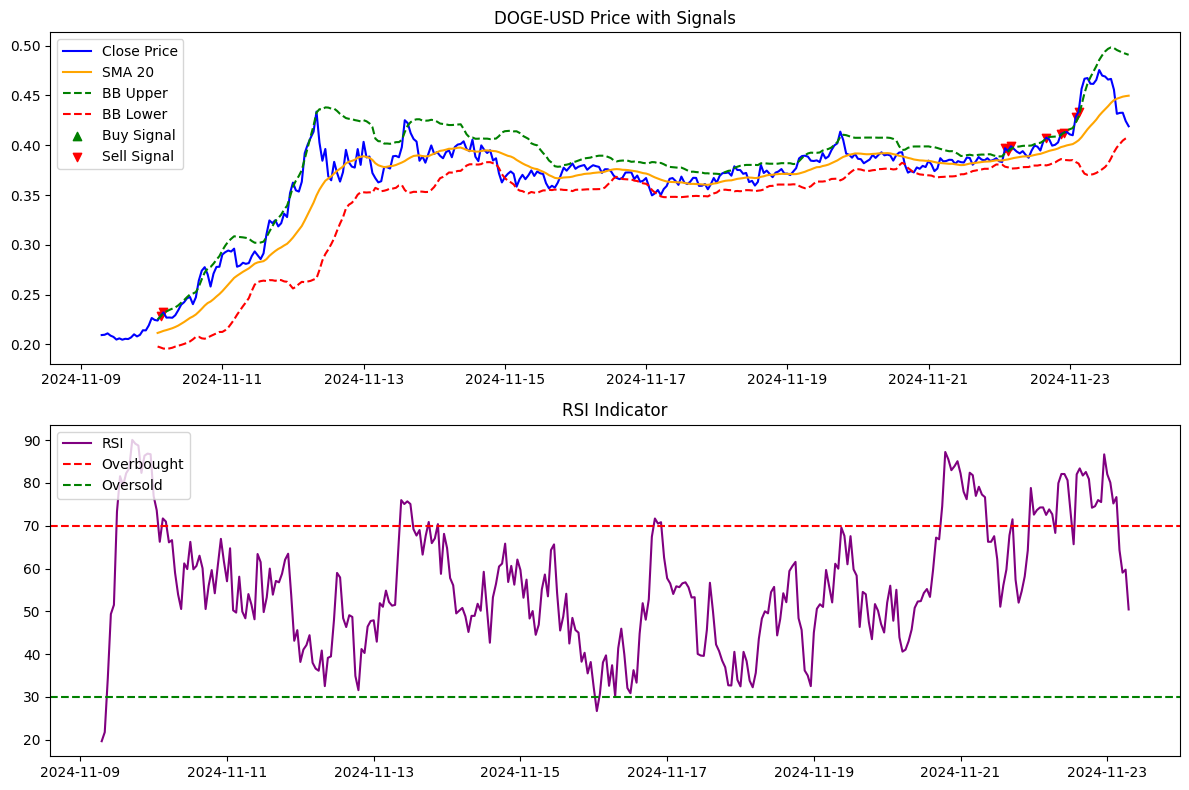

No new signals.
Fetching data for DOGE-USD...

--- Data from Today ---
             timestamp      low     high     open    close       volume
20 2024-11-23 00:00:00  0.40835  0.41756  0.41321  0.41085   45263280.2
19 2024-11-23 01:00:00  0.40444  0.41158  0.41069  0.41000   52885063.7
18 2024-11-23 02:00:00  0.40531  0.43646  0.40993  0.42843  138949419.4
17 2024-11-23 03:00:00  0.42224  0.43508  0.42843  0.43376  139498229.5
16 2024-11-23 04:00:00  0.43362  0.48078  0.43384  0.45659  371398502.3
15 2024-11-23 05:00:00  0.45262  0.46765  0.45665  0.46673   83823031.8
14 2024-11-23 06:00:00  0.45856  0.47189  0.46668  0.46741   66838600.5
13 2024-11-23 07:00:00  0.45655  0.46881  0.46744  0.46171   39688501.0
12 2024-11-23 08:00:00  0.45369  0.46272  0.46185  0.46159   35627862.3
11 2024-11-23 09:00:00  0.45949  0.47270  0.46157  0.46555   41647635.8
10 2024-11-23 10:00:00  0.46548  0.47970  0.46548  0.47545   46381263.2
9  2024-11-23 11:00:00  0.46812  0.48000  0.47555  0.46990   3998

In [4]:
# Fetch Historical Data (Example with Coinbase API or a free service like Binance or Yahoo Finance) 
def fetch_historical_data(symbol="DOGE-USD", interval="1hr"): 
    url = f"https://api.exchange.coinbase.com/products/{symbol}/candles?granularity=3600" 
    response = requests.get(url) 
    if response.status_code == 200: 
        data = response.json()
        df = pd.DataFrame(data, columns=["timestamp", "low", "high", "open", "close", "volume"]) 
        df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s") 
        df.sort_values("timestamp", inplace=True) 
        return df 
    else: 
        raise Exception("Failed to fetch historical data") 
    
# Calculate Indicators 
def calculate_indicators(df): 
        # Moving Averages 
    df["SMA_20"] = df["close"].rolling(window=20).mean() 
    df["SMA_50"] = df["close"].rolling(window=50).mean() 
        
# Bollinger Bands 
    df["BB_upper"] = df["SMA_20"] + 2 * df["close"].rolling(window=20).std() 
    df["BB_lower"] = df["SMA_20"] - 2 * df["close"].rolling(window=20).std() 
    
# Relative Strength Index (RSI) 
    delta = df["close"].diff() 
    gain = np.where(delta > 0, delta, 0) 
    loss = np.where(delta < 0, -delta, 0) 
    avg_gain = pd.Series(gain).rolling(window=14).mean() 
    avg_loss = pd.Series(loss).rolling(window=14).mean() 
    rs = avg_gain / avg_loss 
    df["RSI"] = 100 - (100 / (1 + rs)) 
    
    return df 

# Buy/Sell Signals 
def generate_signals(df): 
    df["Buy_Signal"] = (df["RSI"] < 30) & (df["close"] < df["BB_lower"]) 
    df["Sell_Signal"] = (df["RSI"] > 70) & (df["close"] > df["BB_upper"]) 
    return df 

# Visualize Data 
def plot_signals(df): 
    plt.figure(figsize=(12, 8)) 
    
    # Price with Bollinger Bands 
    plt.subplot(2, 1, 1) 
    plt.plot(df["timestamp"], df["close"], label="Close Price", color="blue") 
    plt.plot(df["timestamp"], df["SMA_20"], label="SMA 20", color="orange") 
    plt.plot(df["timestamp"], df["BB_upper"], label="BB Upper", linestyle="--", color="green") 
    plt.plot(df["timestamp"], df["BB_lower"], label="BB Lower", linestyle="--", color="red") 
    plt.scatter(df["timestamp"][df["Buy_Signal"]], df["close"][df["Buy_Signal"]], label="Buy Signal", marker="^", color="green", alpha=1) 
    plt.scatter(df["timestamp"][df["Sell_Signal"]], df["close"][df["Sell_Signal"]], label="Sell Signal", marker="v", color="red", alpha=1) 
    plt.legend(loc="upper left") 
    plt.title("DOGE-USD Price with Signals") 
    
    # RSI 
    plt.subplot(2, 1, 2) 
    plt.plot(df["timestamp"], df["RSI"], label="RSI", color="purple") 
    plt.axhline(70, linestyle="--", color="red", label="Overbought") 
    plt.axhline(30, linestyle="--", color="green", label="Oversold") 
    plt.legend(loc="upper left") 
    plt.title("RSI Indicator") 
    plt.tight_layout() 
    plt.show() 
    
# Main Logic 
if __name__ == "__main__": 
    try: 
            # Fetch data 
        symbol = "DOGE-USD" 
        df = fetch_historical_data(symbol)         
        df = calculate_indicators(df) 
        df = generate_signals(df) 
    
            # Display data and signals 
        plot_signals(df) 
            
            # Alert on the most recent signal 
        if df["Buy_Signal"].iloc[-1]: 
            print("Buy Signal Detected!") 
        elif df["Sell_Signal"].iloc[-1]: 
            print("Sell Signal Detected!") 
        else: 
            print("No new signals.") 
                
    except Exception as e: 
        print(f"Error: {e}")

    
if __name__ == "__main__":

    live_update(symbol="DOGE-USD", interval=60)

In [5]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import pygame

import requests

import time

from datetime import datetime, timedelta

pygame 2.6.1 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


Fetching data for DOGE-USD...


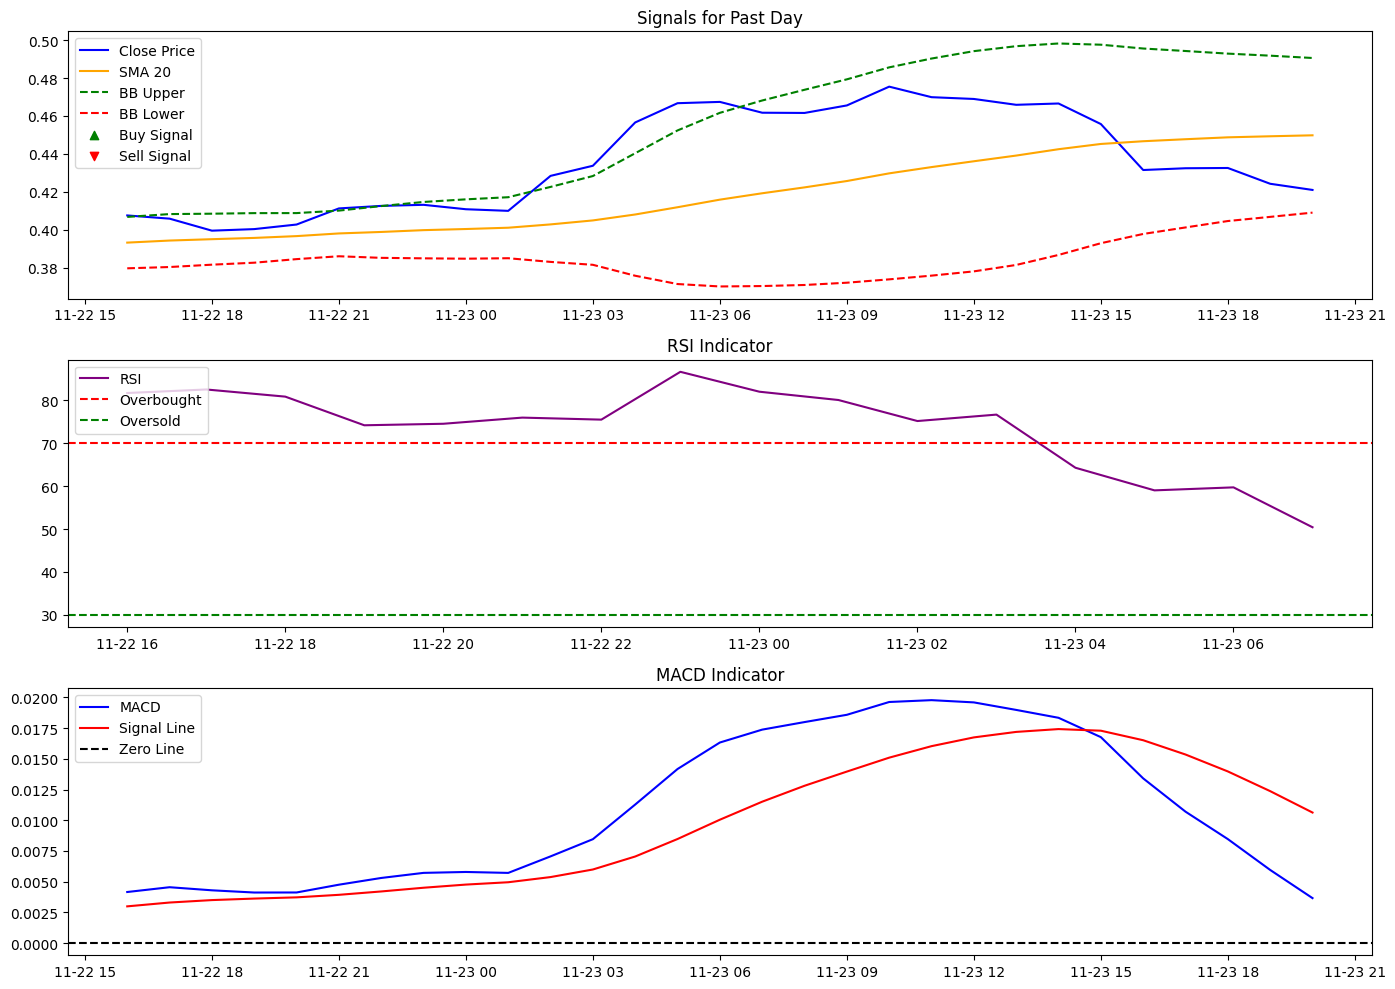

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


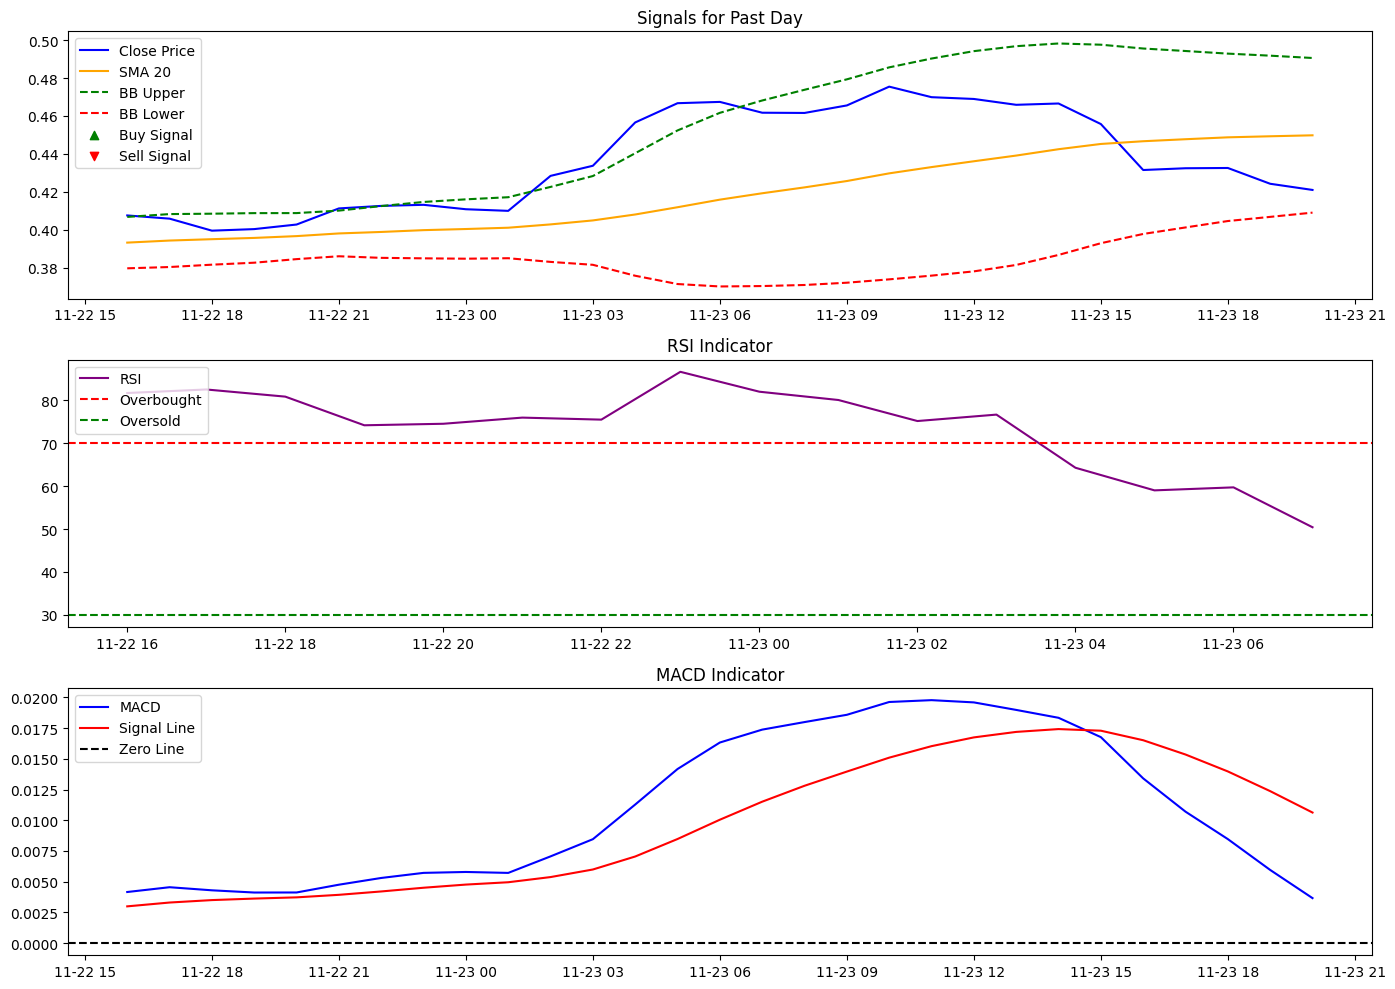

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


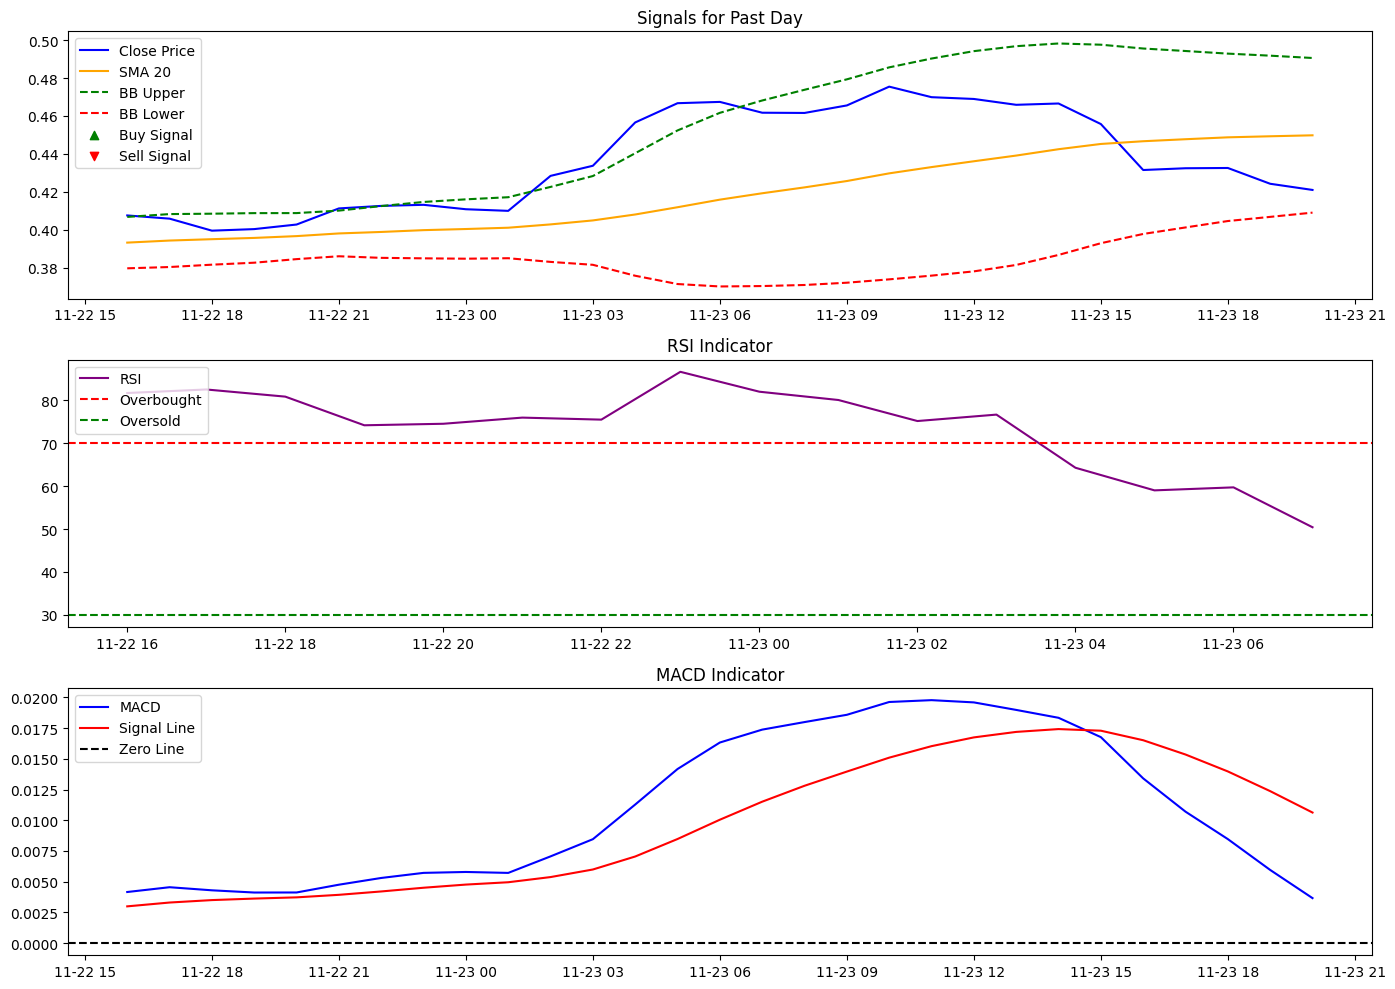

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


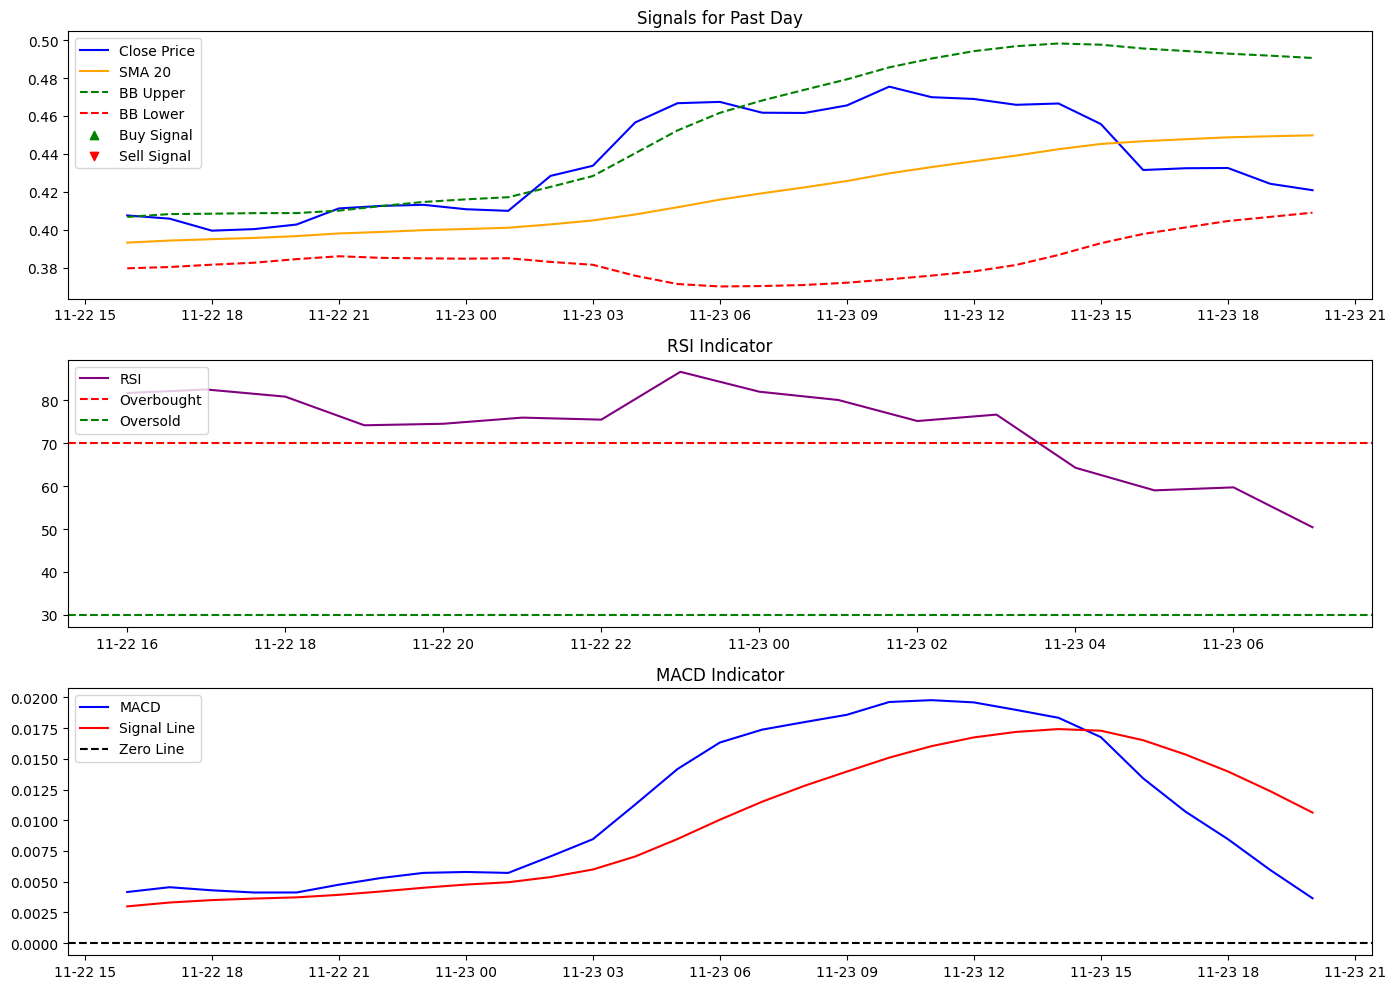

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


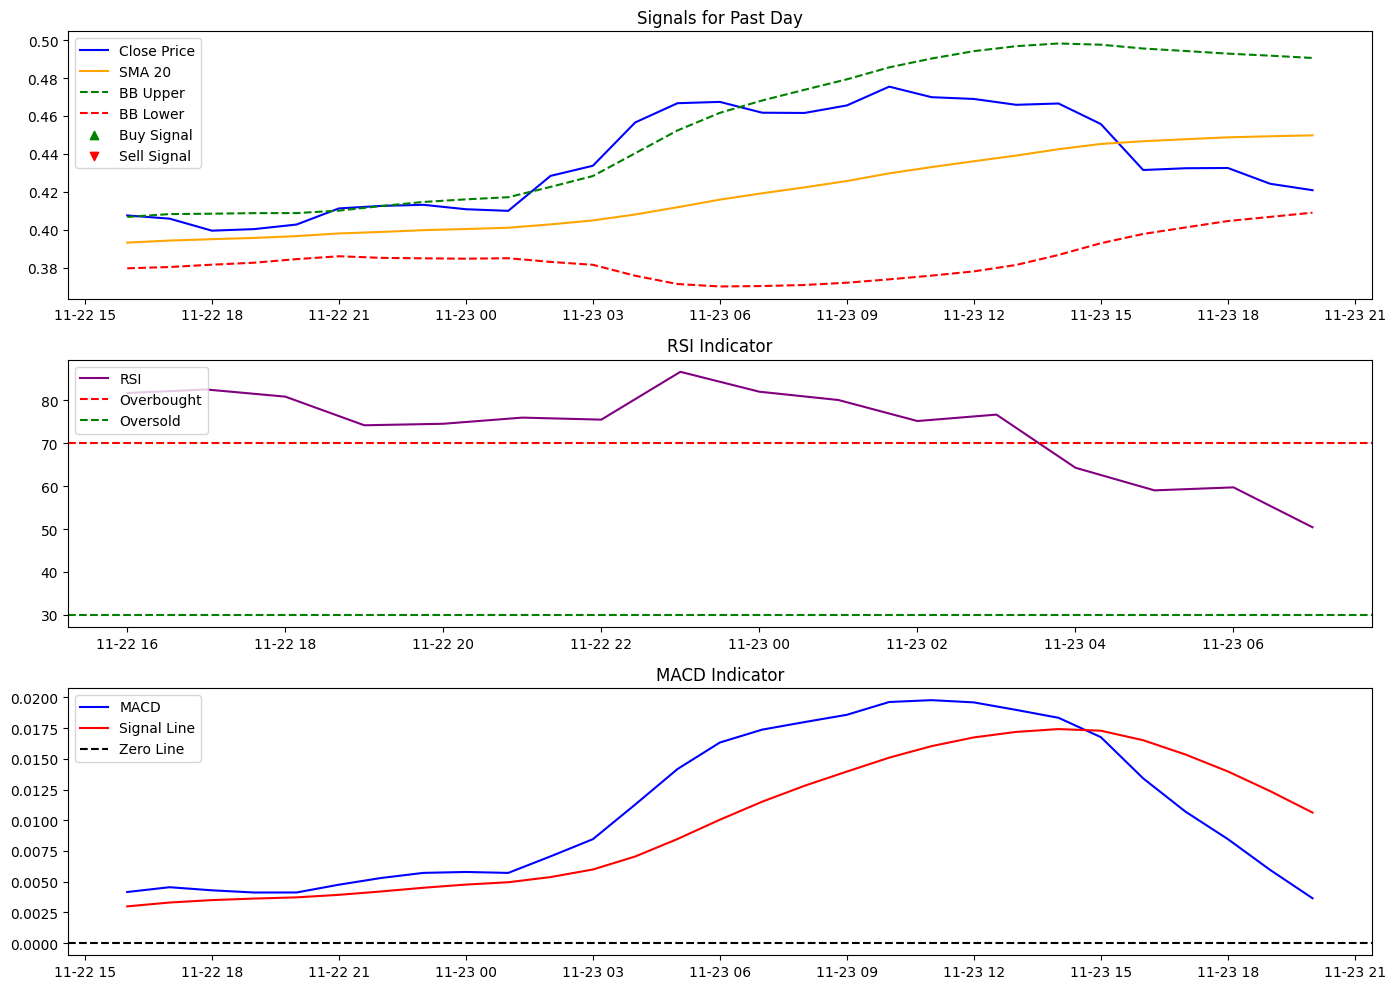

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


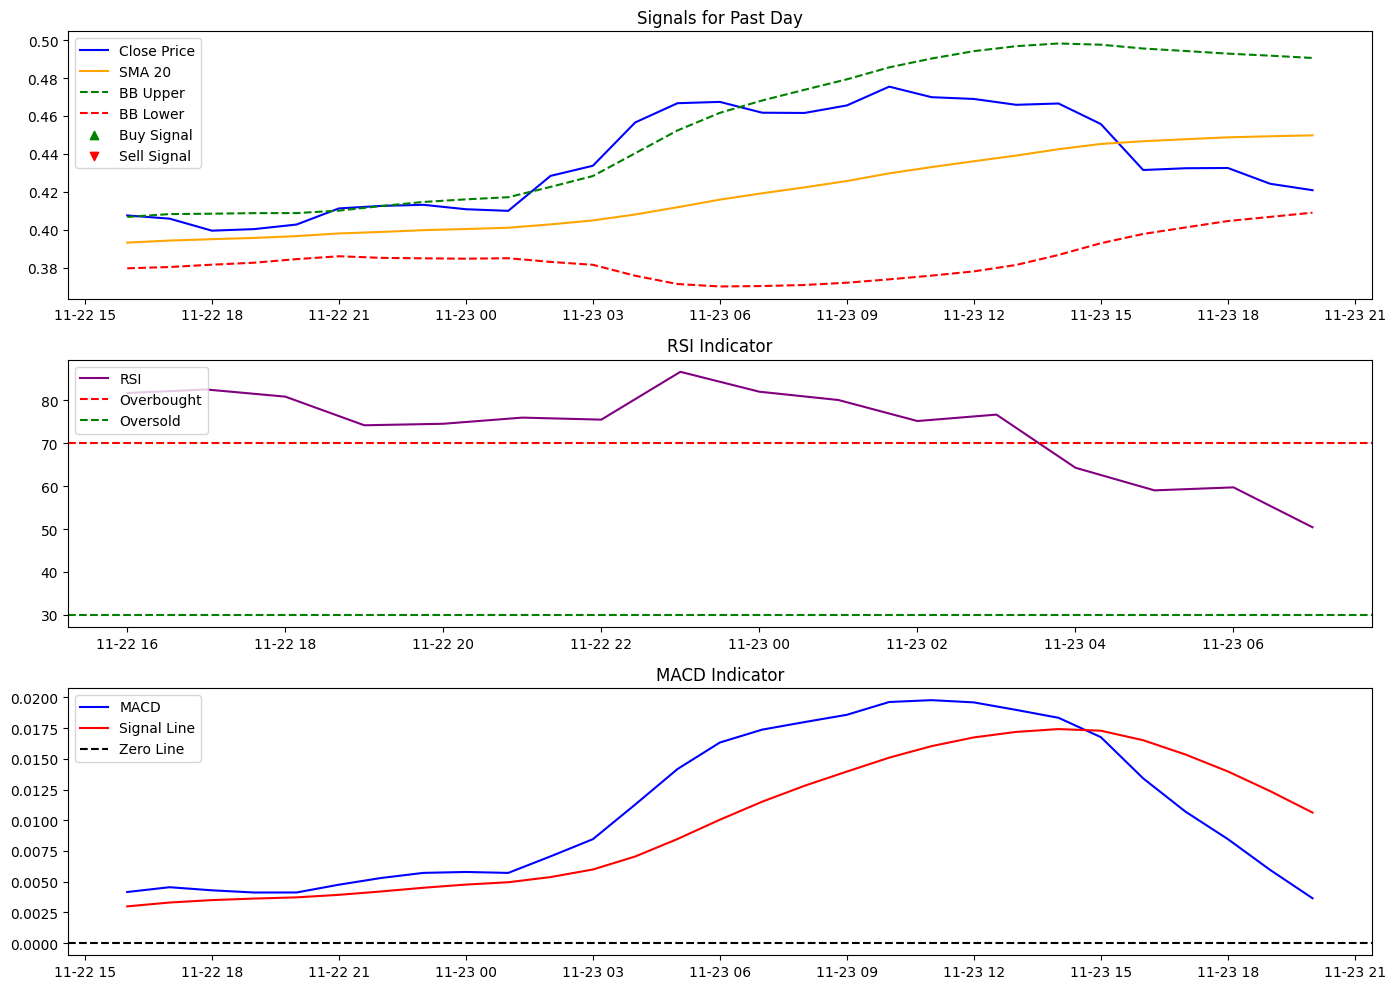

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


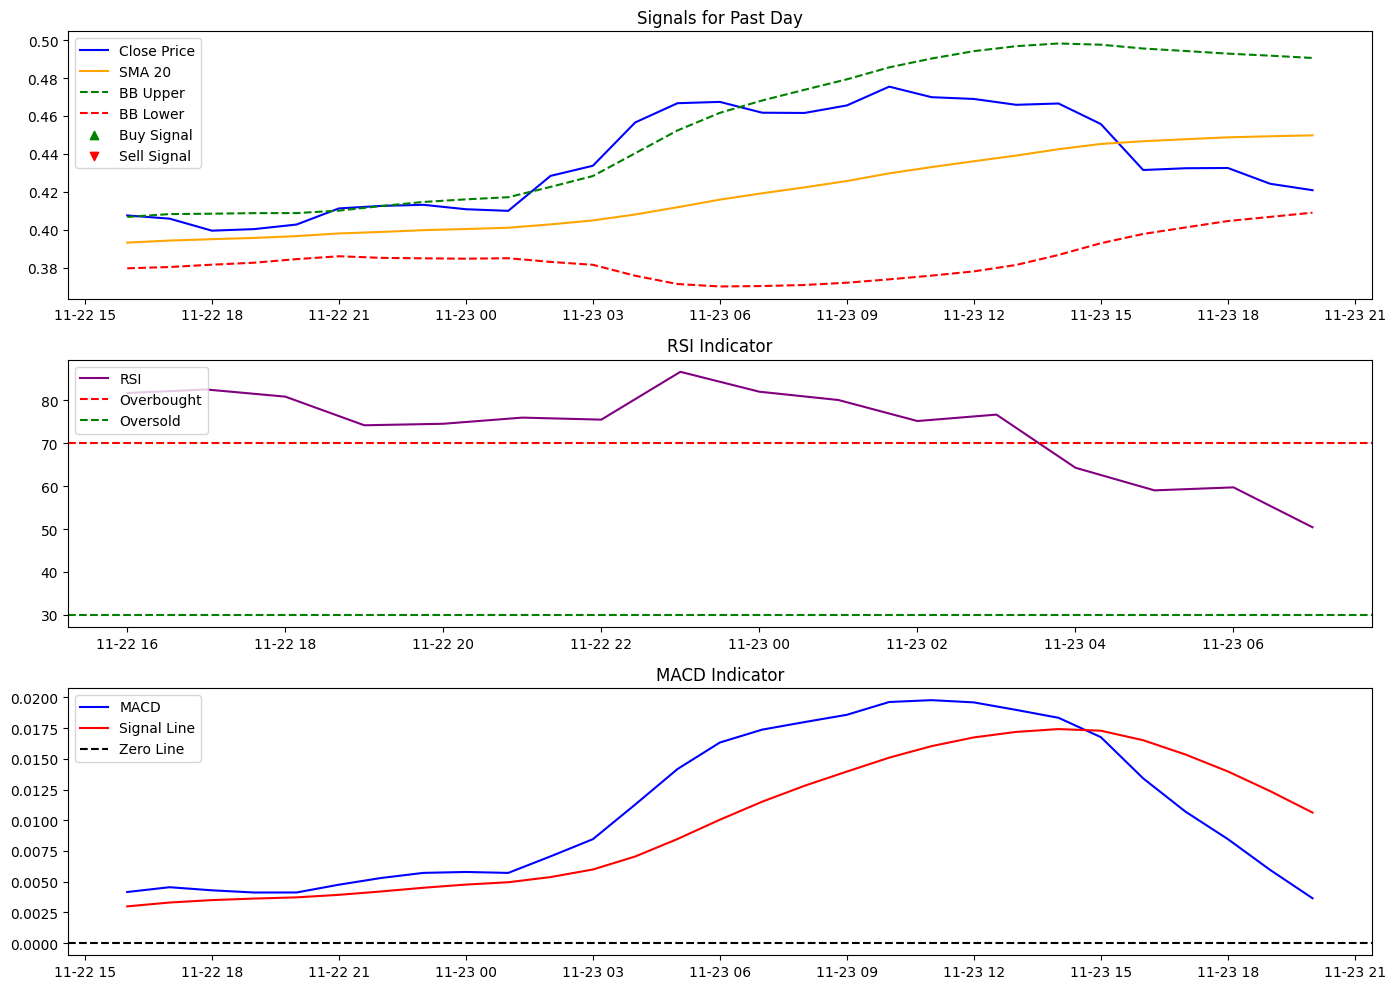

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


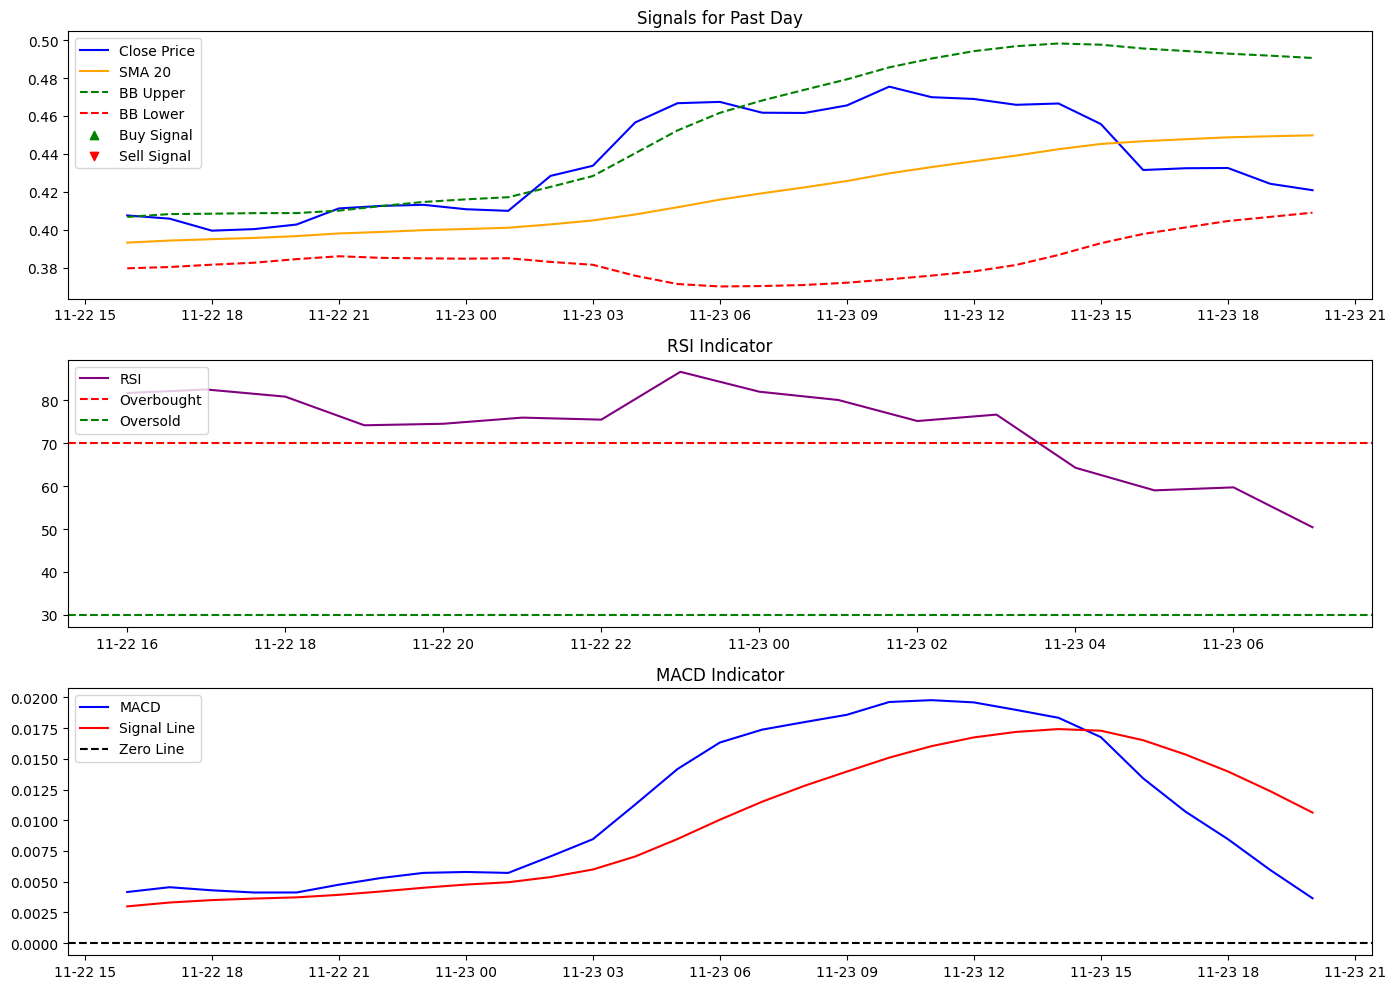

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


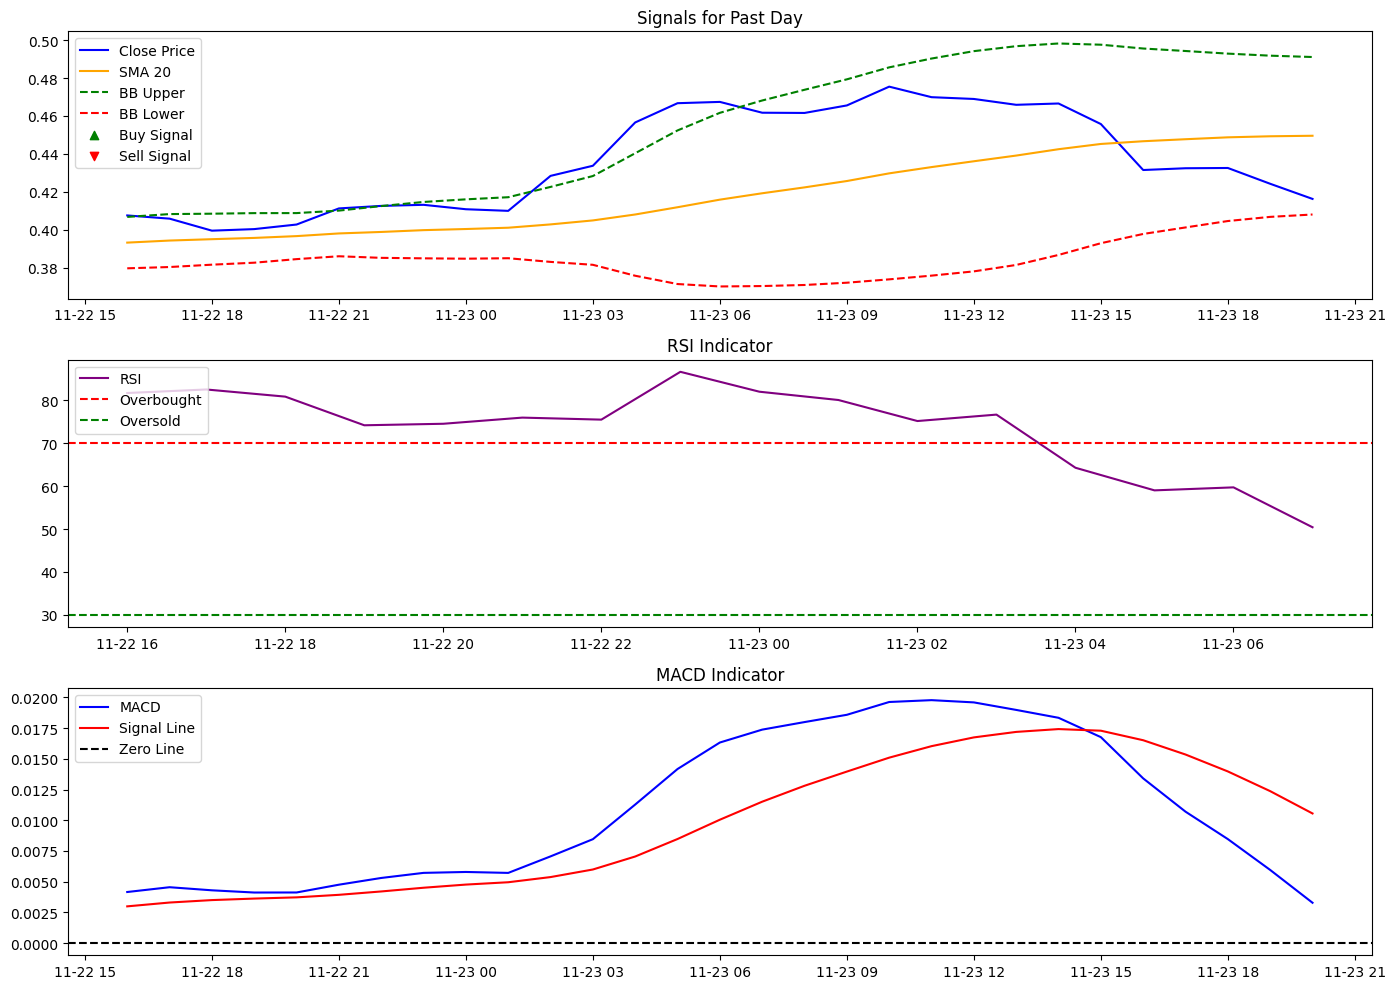

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


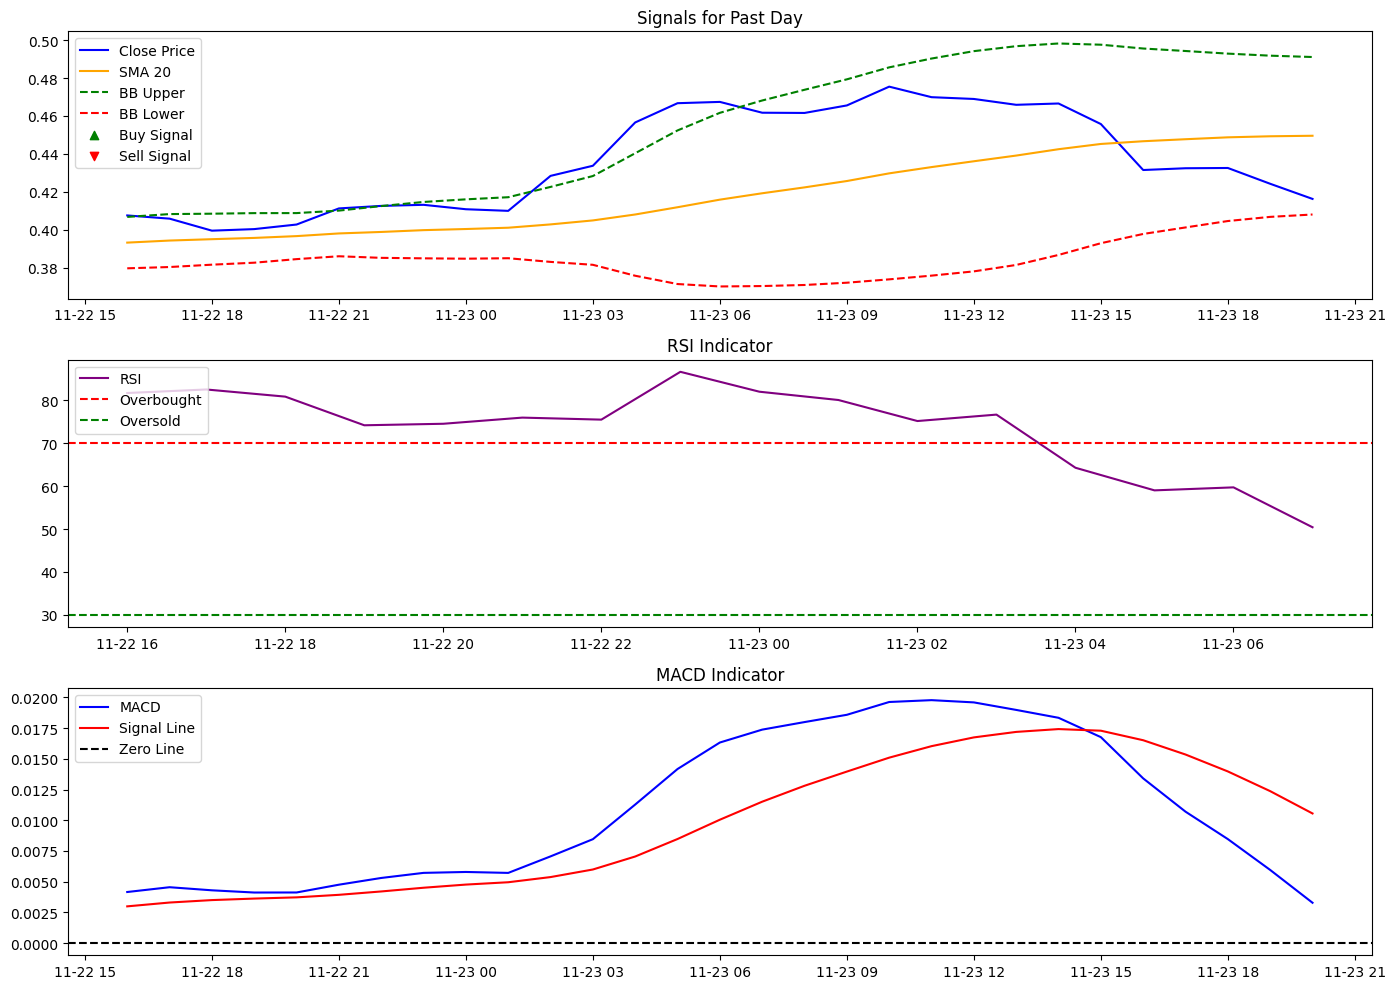

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


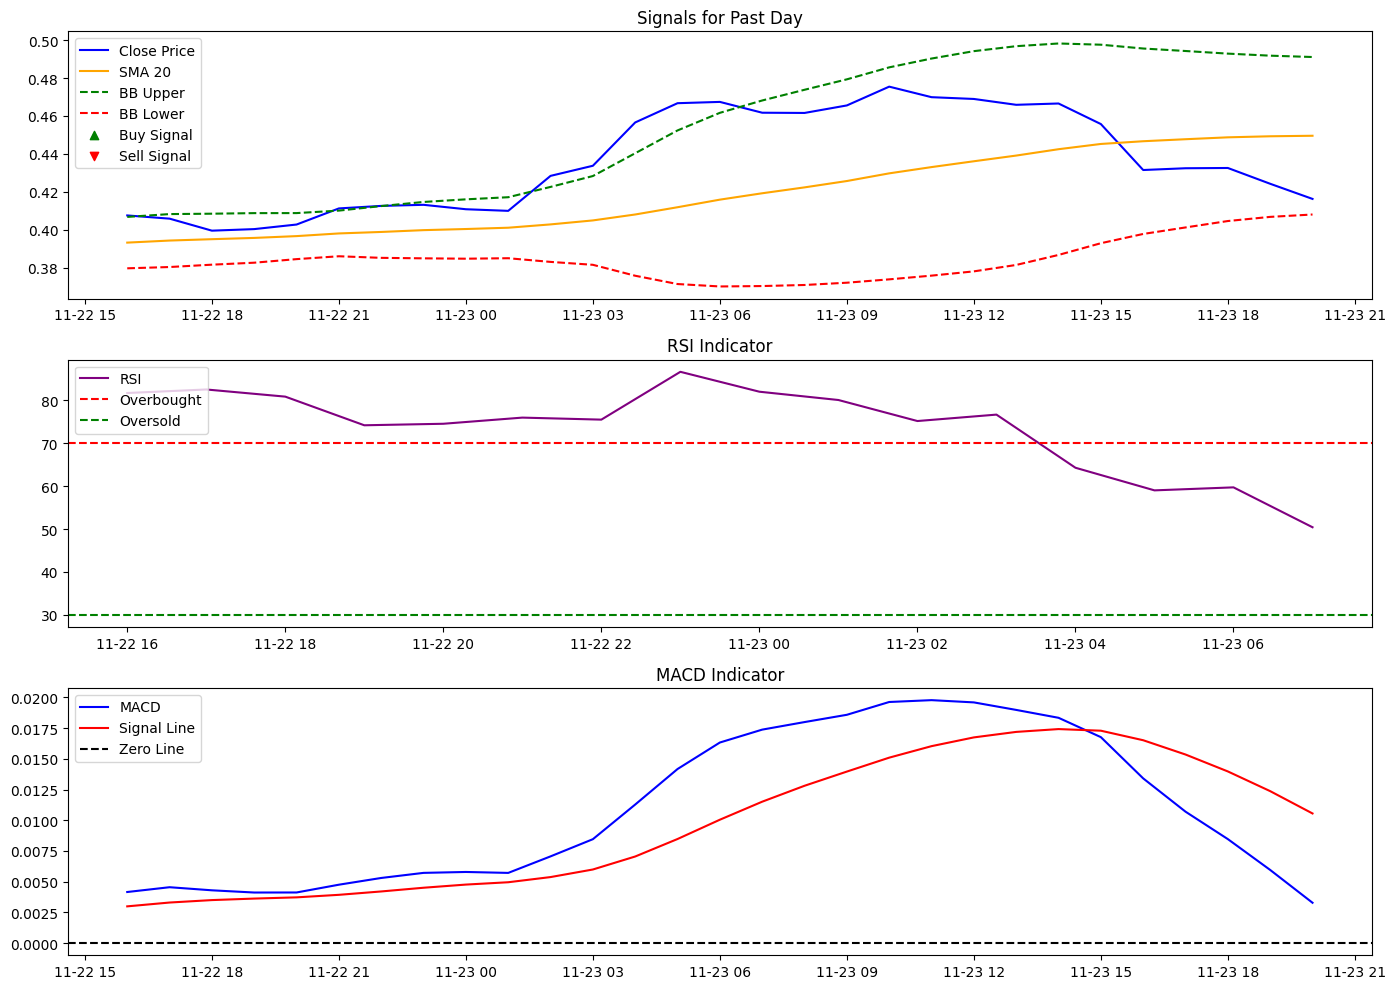

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


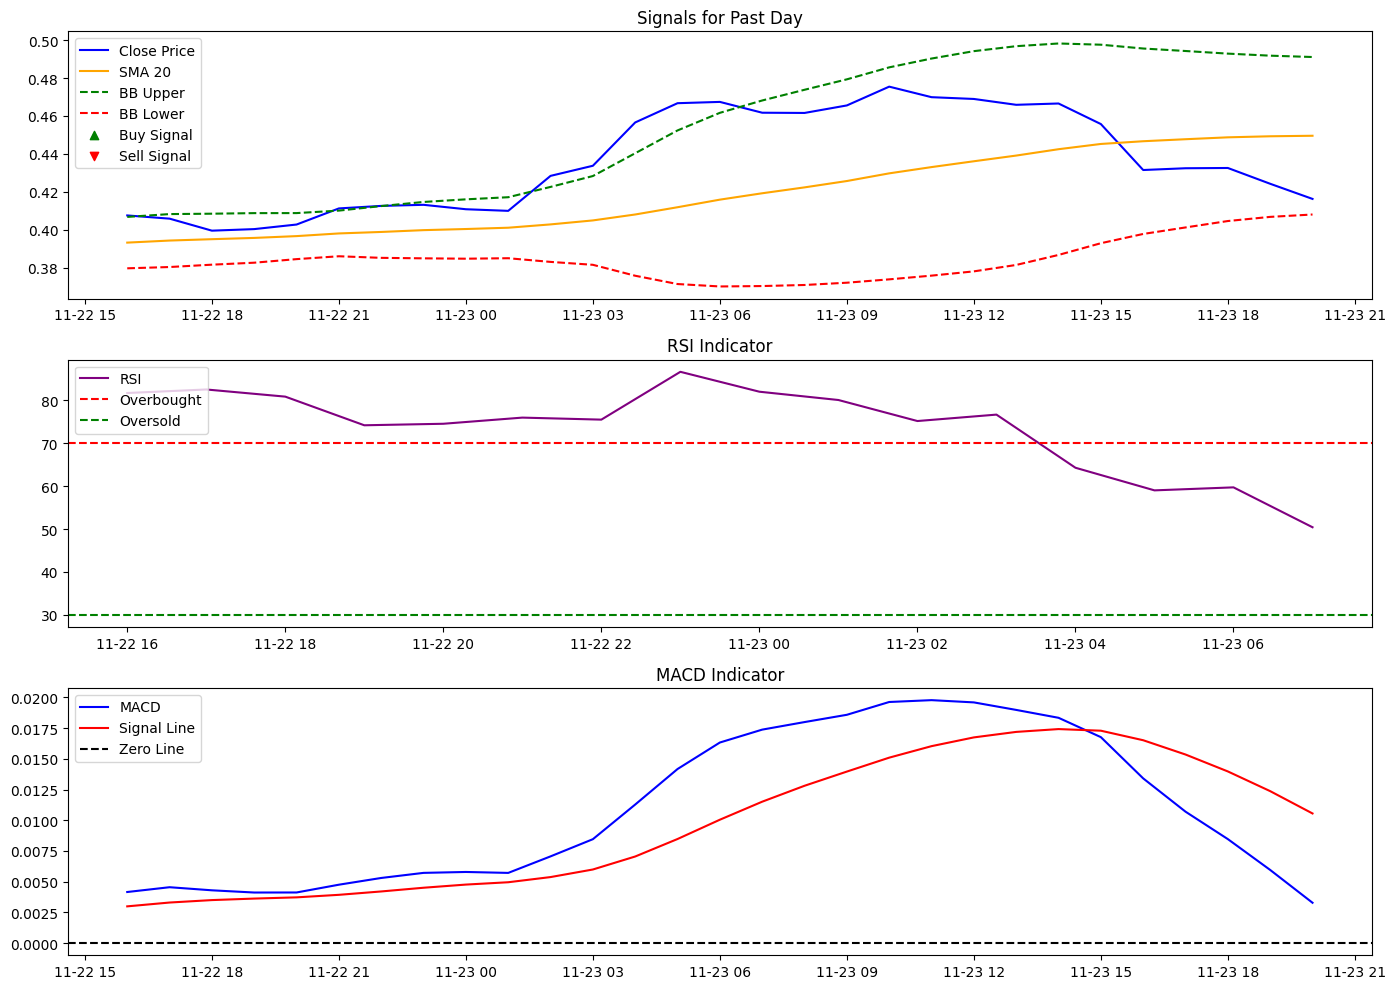

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


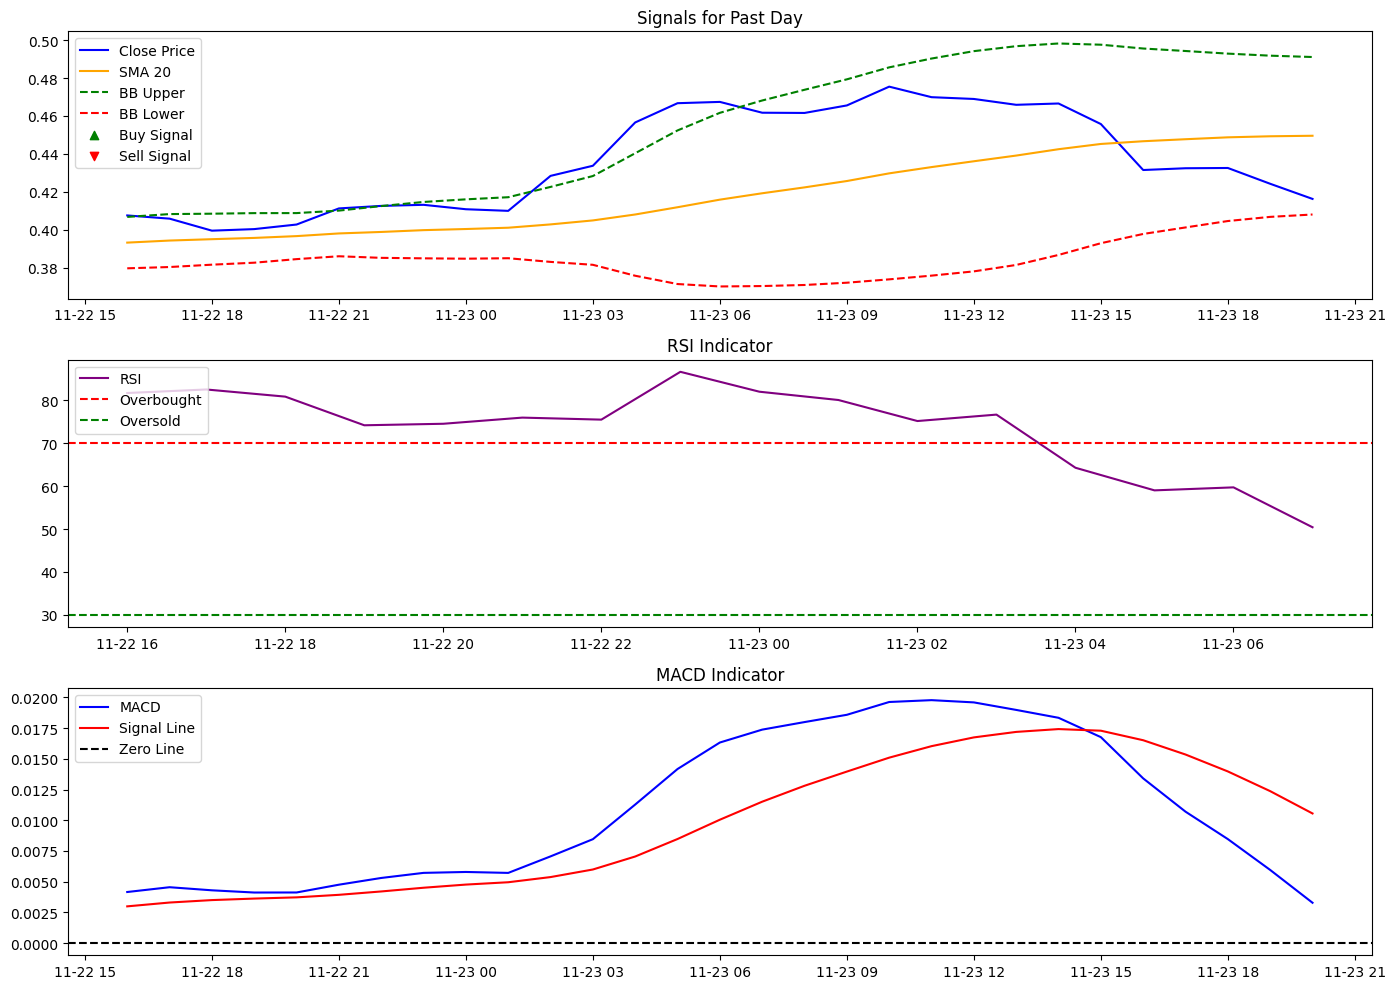

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


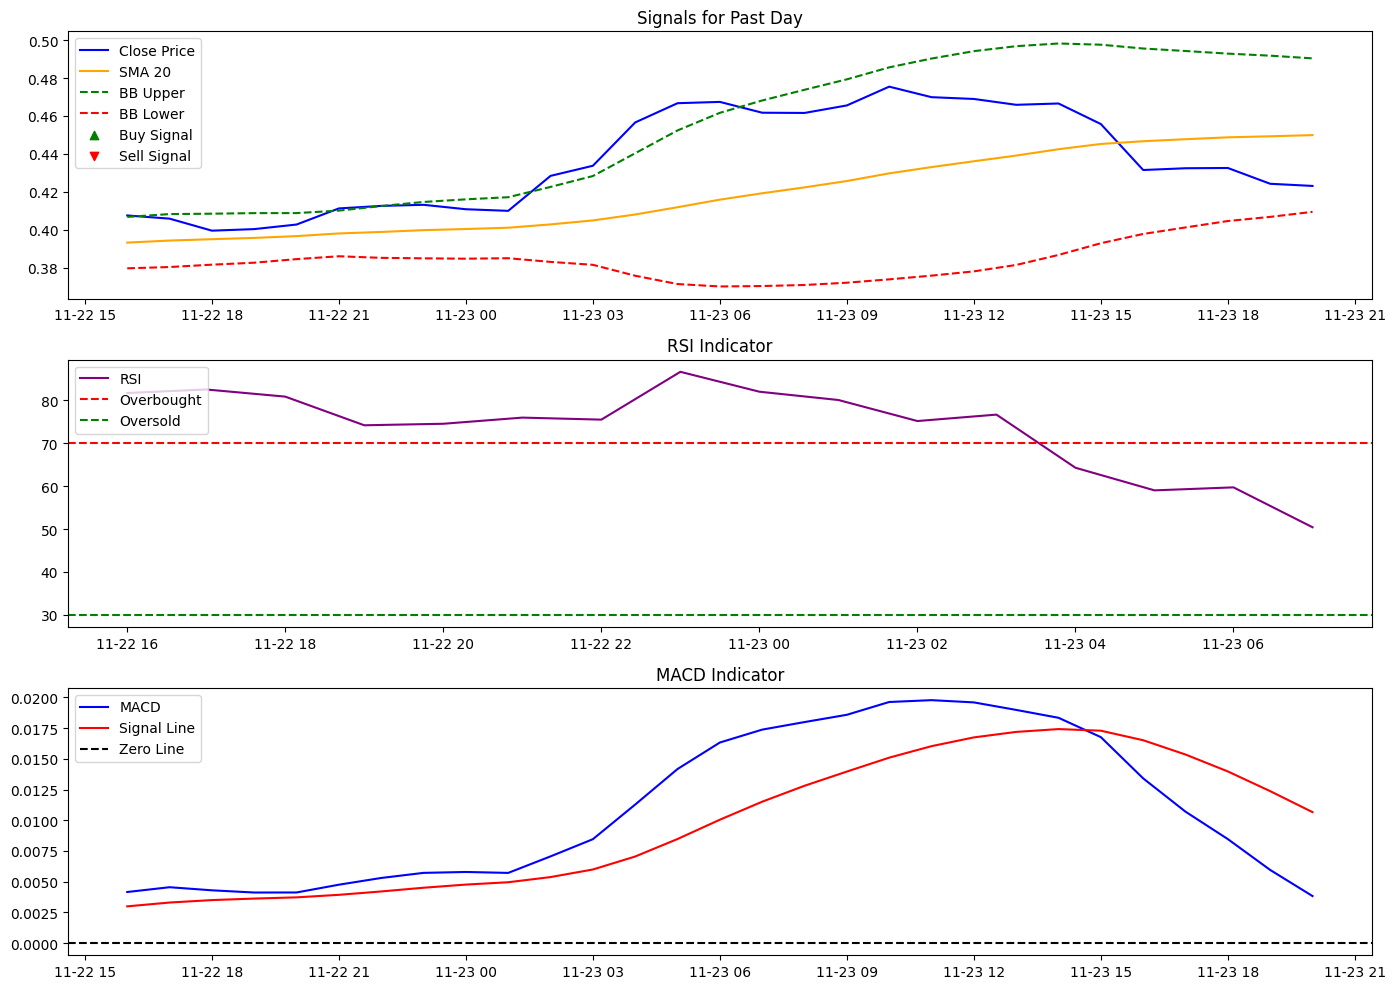

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


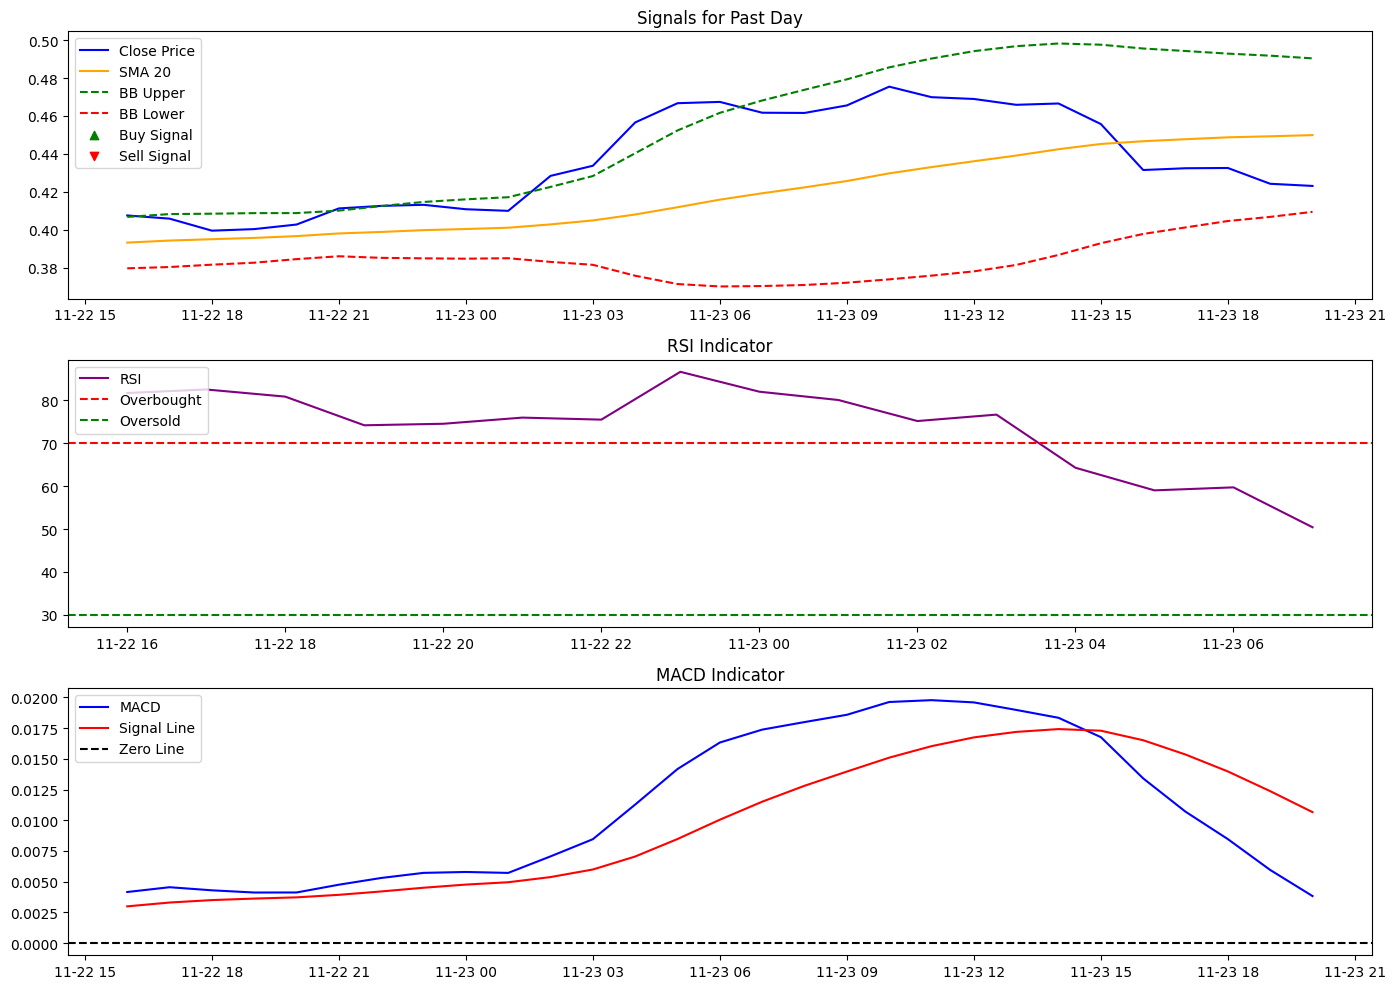

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


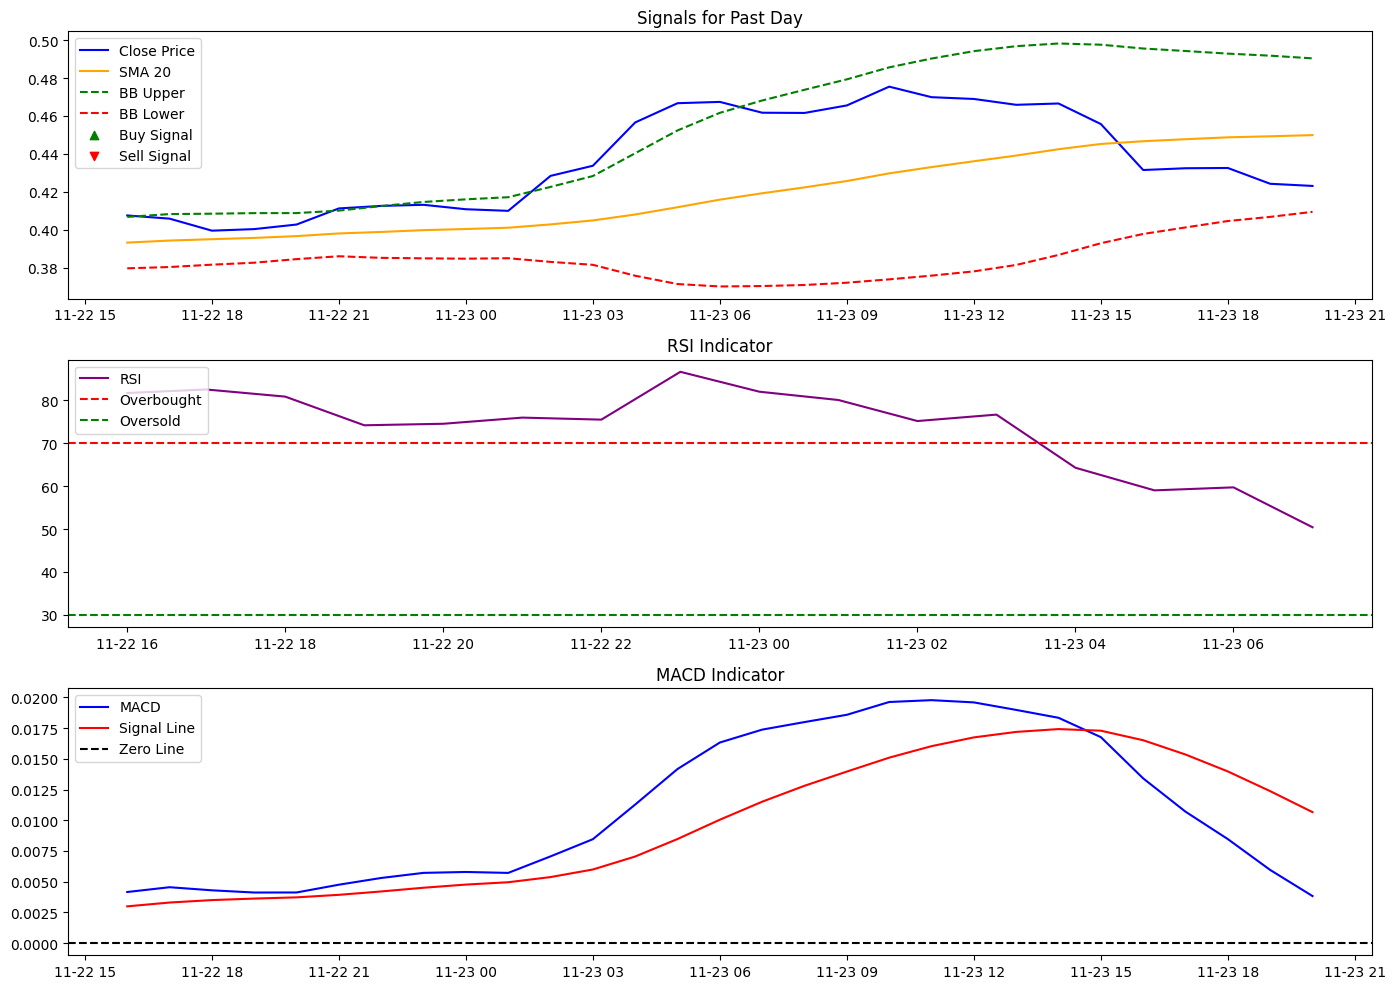

No new signals detected.
Waiting 60 seconds before fetching new data...

Fetching data for DOGE-USD...


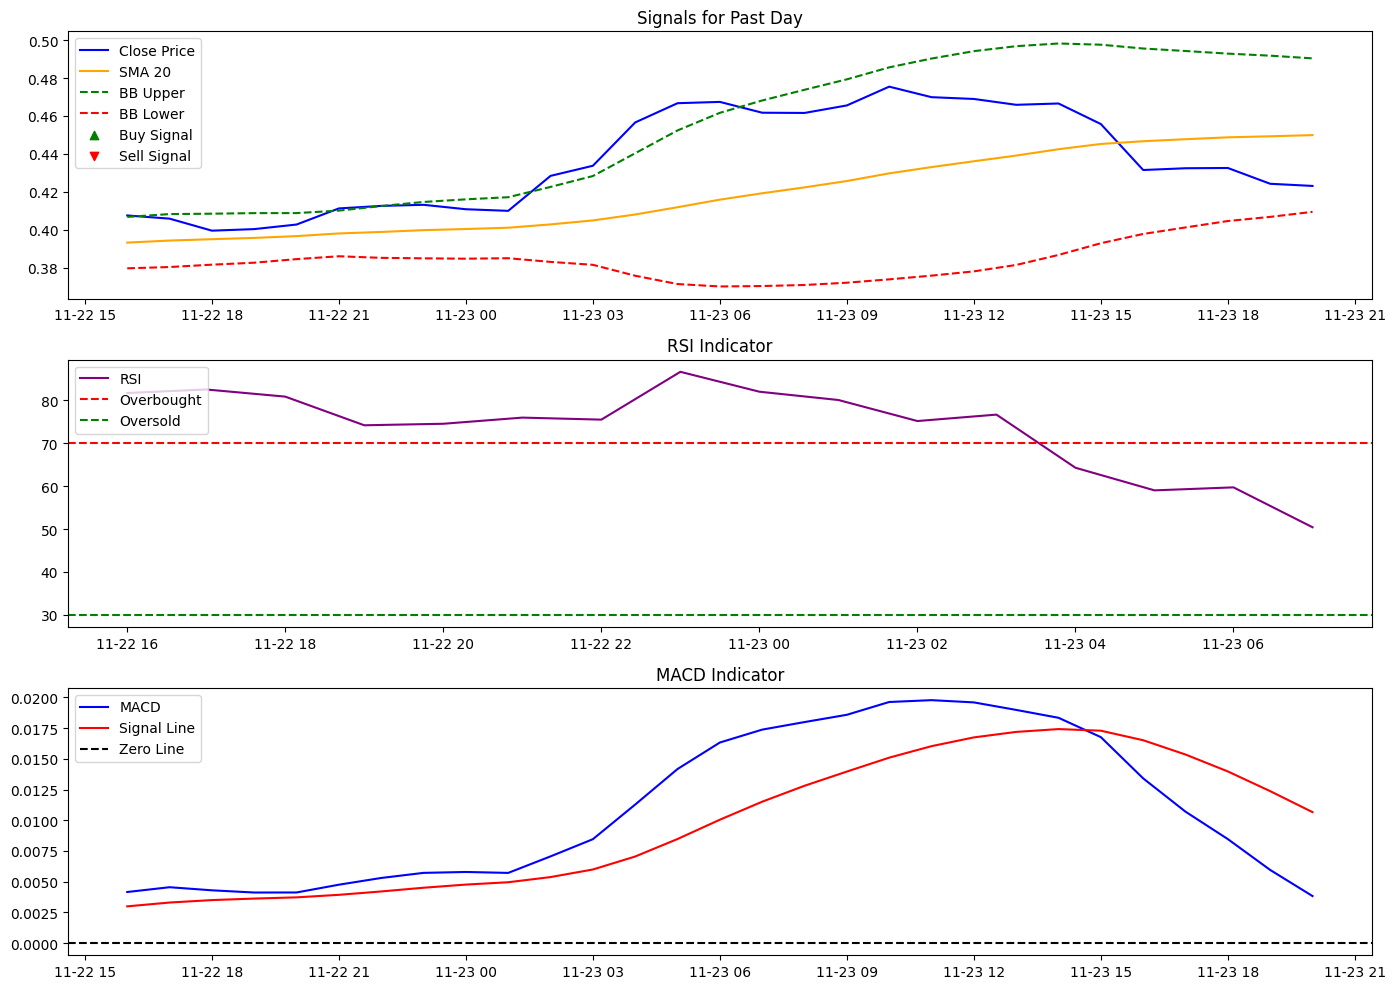

No new signals detected.
Waiting 60 seconds before fetching new data...



In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import pygame

import requests

import time

from datetime import datetime, timedelta



# Initialize pygame for sounds

pygame.mixer.init()



# Sound files for buy/sell signals

BUY_SOUND = "buy_signal.mp3"  # Place in the same directory

SELL_SOUND = "sell_signal.mp3"  # Place in the same directory



# Fetch Historical Data

def fetch_historical_data(symbol="DOGE-USD", granularity=3600):

    url = f"https://api.exchange.coinbase.com/products/{symbol}/candles?granularity={granularity}"

    response = requests.get(url)

    if response.status_code == 200:

        data = response.json()

        df = pd.DataFrame(data, columns=["timestamp", "low", "high", "open", "close", "volume"])

        df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

        df.sort_values("timestamp", inplace=True)

        return df

    else:

        raise Exception(f"Failed to fetch historical data: {response.status_code}")



# Calculate Indicators

def calculate_indicators(df):

    # Moving Averages

    df["SMA_20"] = df["close"].rolling(window=20).mean()

    df["SMA_50"] = df["close"].rolling(window=50).mean()

    

    # Bollinger Bands

    df["BB_upper"] = df["SMA_20"] + 2 * df["close"].rolling(window=20).std()

    df["BB_lower"] = df["SMA_20"] - 2 * df["close"].rolling(window=20).std()

    

    # Relative Strength Index (RSI)

    delta = df["close"].diff()

    gain = np.where(delta > 0, delta, 0)

    loss = np.where(delta < 0, -delta, 0)

    avg_gain = pd.Series(gain).rolling(window=14).mean()

    avg_loss = pd.Series(loss).rolling(window=14).mean()

    rs = avg_gain / avg_loss

    df["RSI"] = 100 - (100 / (1 + rs))

    

    # MACD

    df["EMA_12"] = df["close"].ewm(span=12, adjust=False).mean()

    df["EMA_26"] = df["close"].ewm(span=26, adjust=False).mean()

    df["MACD"] = df["EMA_12"] - df["EMA_26"]

    df["Signal_Line"] = df["MACD"].ewm(span=9, adjust=False).mean()

    

    return df



# Generate Buy/Sell Signals

def generate_signals(df):

    df["Buy_Signal"] = (df["RSI"] < 30) & (df["MACD"] > df["Signal_Line"])

    df["Sell_Signal"] = (df["RSI"] > 70) & (df["MACD"] < df["Signal_Line"])

    return df



# Play Sound for Signals

def play_signal_sound(signal_type):

    if signal_type == "buy":

        pygame.mixer.music.load(BUY_SOUND)

        pygame.mixer.music.play()

    elif signal_type == "sell":

        pygame.mixer.music.load(SELL_SOUND)

        pygame.mixer.music.play()



# Visualize Data

def plot_signals(df, title):

    plt.figure(figsize=(14, 10))

    

    # Price with Bollinger Bands

    plt.subplot(3, 1, 1)

    plt.plot(df["timestamp"], df["close"], label="Close Price", color="blue")

    plt.plot(df["timestamp"], df["SMA_20"], label="SMA 20", color="orange")

    plt.plot(df["timestamp"], df["BB_upper"], label="BB Upper", linestyle="--", color="green")

    plt.plot(df["timestamp"], df["BB_lower"], label="BB Lower", linestyle="--", color="red")

    plt.scatter(df["timestamp"][df["Buy_Signal"]], df["close"][df["Buy_Signal"]], label="Buy Signal", marker="^", color="green", alpha=1)

    plt.scatter(df["timestamp"][df["Sell_Signal"]], df["close"][df["Sell_Signal"]], label="Sell Signal", marker="v", color="red", alpha=1)

    plt.legend(loc="upper left")

    plt.title(title)

    

    # RSI

    plt.subplot(3, 1, 2)

    plt.plot(df["timestamp"], df["RSI"], label="RSI", color="purple")

    plt.axhline(70, linestyle="--", color="red", label="Overbought")

    plt.axhline(30, linestyle="--", color="green", label="Oversold")

    plt.legend(loc="upper left")

    plt.title("RSI Indicator")

    

    # MACD

    plt.subplot(3, 1, 3)

    plt.plot(df["timestamp"], df["MACD"], label="MACD", color="blue")

    plt.plot(df["timestamp"], df["Signal_Line"], label="Signal Line", color="red")

    plt.axhline(0, linestyle="--", color="black", label="Zero Line")

    plt.legend(loc="upper left")

    plt.title("MACD Indicator")

    

    plt.tight_layout()

    plt.show()



# Filter Data for Timeframes

def filter_data(df, timeframe):

    now = datetime.now()

    

    if timeframe == "past_month":

        start_time = now - timedelta(days=30)

    elif timeframe == "past_week":

        start_time = now - timedelta(days=7)

    elif timeframe == "past_day":

        start_time = now - timedelta(days=1)

    elif timeframe == "past_4_hours":

        start_time = now - timedelta(hours=4)

    elif timeframe == "past_hour":

        start_time = now - timedelta(hours=1)

    else:

        raise ValueError("Invalid timeframe specified")

    

    return df[df["timestamp"] >= start_time]



# Live Update Function

def live_update(symbol="DOGE-USD", granularity=3600, interval=60, timeframe="past_day"):

    try:

        while True:

            print(f"Fetching data for {symbol}...")

            

            # Fetch and process data

            df = fetch_historical_data(symbol, granularity)

            df = calculate_indicators(df)

            df = generate_signals(df)

            

            # Filter data for the selected timeframe

            filtered_data = filter_data(df, timeframe)

            

            # Plot signals

            title = f"Signals for {timeframe.replace('_', ' ').title()}"

            plot_signals(filtered_data, title)

            

            # Check for recent buy/sell signals and play sounds

            if filtered_data["Buy_Signal"].iloc[-1]:

                print("Buy Signal Detected!")

                play_signal_sound("buy")

            elif filtered_data["Sell_Signal"].iloc[-1]:

                print("Sell Signal Detected!")

                play_signal_sound("sell")

            else:

                print("No new signals detected.")

            

            # Wait for the next update

            print(f"Waiting {interval} seconds before fetching new data...\n")

            time.sleep(interval)



    except KeyboardInterrupt:

        print("Live updating stopped by user.")



    except Exception as e:

        print(f"An error occurred: {e}")



# Run the live update

if __name__ == "__main__":

    live_update(symbol="DOGE-USD", granularity=3600, interval=60, timeframe="past_day")